# DragonNet

__Reference__: [Claudia Shi et al, Adapting Neural Networks for the Estimation of Treatment Effects, NeurIPS 2019](https://arxiv.org/pdf/1906.02120v2.pdf)

__Implementation remarks__: our implementation is exactly the same of the original paper with the exception 
    of a _sklearn.preprocessing.StandardScaler_ which was originally used to scale predictions. 

## DragonNet on IHDP 

In [1]:
from causalforge.model import Model , PROBLEM_TYPE
from causalforge.data_loader import DataLoader 

# load IHDP dataset 
r = DataLoader.get_loader('IHDP').load()
X_tr, T_tr, YF_tr, YCF_tr, mu_0_tr, mu_1_tr, X_te, T_te, YF_te, YCF_te, mu_0_te, mu_1_te = r

# model 
params={}
params['input_dim'] = X_tr.shape[1] 
    
    
dragonnet = Model.create_model("dragonnet",
                               params,
                               problem_type=PROBLEM_TYPE.CAUSAL_TREATMENT_EFFECT_ESTIMATION, 
                               multiple_treatments=False)

dragonnet.model.summary()

2023-05-16 14:45:52.107544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 200)          5200        ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 200)          40200       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 200)          40200       ['dense_1[0][0]']                
                                                                                              

2023-05-16 14:45:58.963205: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from causalforge.metrics import eps_ATE_diff, PEHE_with_ite
import numpy as np

experiment_ids = [1,10,400]

eps_ATE_tr, eps_ATE_te = [], []
eps_PEHE_tr, eps_PEHE_te = [] , [] 



for idx in experiment_ids:    
    t_tr, y_tr, x_tr, mu0tr, mu1tr = T_tr[:,idx] , YF_tr[:,idx], X_tr[:,:,idx], mu_0_tr[:,idx], mu_1_tr[:,idx] 
    t_te, y_te, x_te, mu0te, mu1te = T_te[:,idx] , YF_te[:,idx], X_te[:,:,idx], mu_0_te[:,idx], mu_1_te[:,idx]  
    
    
    # Train your causal method on train-set ...
    dragonnet.fit(x_tr,t_tr,y_tr)

    # Validate your method test-set ... 
    ATE_truth_tr = (mu1tr - mu0tr).mean()
    ATE_truth_te = (mu1te - mu0te).mean()
    
    ITE_truth_tr = (mu1tr - mu0tr)
    ITE_truth_te = (mu1te - mu0te)
    
    eps_ATE_tr.append( eps_ATE_diff( dragonnet.predict_ate(x_tr,t_tr,y_tr), ATE_truth_tr) )
    eps_ATE_te.append( eps_ATE_diff( dragonnet.predict_ate(x_te,t_te,y_te), ATE_truth_te) )
    
    eps_PEHE_tr.append( PEHE_with_ite( dragonnet.predict_ite(x_tr), ITE_truth_tr, sqrt=True))
    eps_PEHE_te.append( PEHE_with_ite( dragonnet.predict_ite(x_te), ITE_truth_te , sqrt=True))
        

/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
9/9 [==============================] - 2s 45ms/step - loss: 1956.4551 - regression_loss: 899.6511 - binary_classification_loss: 35.6779 - treatment_accuracy: 0.7858 - track_epsilon: 0.0306 - val_loss: 847.0165 - val_regression_loss: 302.4681 - val_binary_classification_loss: 20.6263 - val_treatment_accuracy: 0.8006 - val_track_epsilon: 0.0294 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 462.4966 - regression_loss: 201.6938 - binary_classification_loss: 31.4700 - treatment_accuracy: 0.8096 - track_epsilon: 0.0302 - val_loss: 358.0323 - val_regression_loss: 116.9679 - val_binary_classification_loss: 22.4148 - val_treatment_accuracy: 0.8006 - val_track_epsilon: 0.0298 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - 0s 7ms/step - loss: 297.4020 - regression_loss: 124.4588 - binary_classification_loss: 31.2752 - treatment_accuracy: 0.8015 - track_epsilon: 0.0286 - val_loss: 336.0899 - val_regression_loss: 113.6319 - val_binary_

/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


9/9 [==============================] - 1s 40ms/step - loss: 181.5604 - regression_loss: 70.2194 - binary_classification_loss: 27.7884 - treatment_accuracy: 0.8042 - track_epsilon: 0.0213 - val_loss: 159.9911 - val_regression_loss: 47.4322 - val_binary_classification_loss: 20.3936 - val_treatment_accuracy: 0.8006 - val_track_epsilon: 0.0180 - lr: 1.0000e-05
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 177.4645 - regression_loss: 69.0841 - binary_classification_loss: 27.8036 - treatment_accuracy: 0.8069 - track_epsilon: 0.0160 - val_loss: 164.2597 - val_regression_loss: 49.0906 - val_binary_classification_loss: 20.3375 - val_treatment_accuracy: 0.8006 - val_track_epsilon: 0.0121 - lr: 1.0000e-05
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 177.6404 - regression_loss: 69.1538 - binary_classification_loss: 27.8060 - treatment_accuracy: 0.8096 - track_epsilon: 0.0098 - val_loss: 159.9557 - val_regression_loss: 47.5913 - val_binary_classifi

9/9 [==============================] - 0s 5ms/step - loss: 171.4160 - regression_loss: 65.5815 - binary_classification_loss: 27.3223 - treatment_accuracy: 0.8024 - track_epsilon: 0.0040 - val_loss: 158.8785 - val_regression_loss: 47.2248 - val_binary_classification_loss: 20.0154 - val_treatment_accuracy: 0.7954 - val_track_epsilon: 0.0051 - lr: 1.0000e-05
Epoch 24/100
9/9 [==============================] - 0s 5ms/step - loss: 166.5356 - regression_loss: 64.4013 - binary_classification_loss: 27.2656 - treatment_accuracy: 0.7988 - track_epsilon: 0.0037 - val_loss: 155.2286 - val_regression_loss: 46.0794 - val_binary_classification_loss: 20.0641 - val_treatment_accuracy: 0.7954 - val_track_epsilon: 0.0018 - lr: 1.0000e-05
Epoch 25/100
9/9 [==============================] - 0s 5ms/step - loss: 168.8871 - regression_loss: 64.7578 - binary_classification_loss: 27.2743 - treatment_accuracy: 0.7997 - track_epsilon: 0.0038 - val_loss: 160.1026 - val_regression_loss: 47.5524 - val_binary_classif

Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 163.7199 - regression_loss: 62.6896 - binary_classification_loss: 27.0446 - treatment_accuracy: 0.8133 - track_epsilon: 0.0031 - val_loss: 154.0120 - val_regression_loss: 45.5833 - val_binary_classification_loss: 19.9477 - val_treatment_accuracy: 0.7954 - val_track_epsilon: 0.0030 - lr: 2.5000e-06
Epoch 45/100
9/9 [==============================] - 0s 5ms/step - loss: 159.1819 - regression_loss: 62.7813 - binary_classification_loss: 27.0429 - treatment_accuracy: 0.8024 - track_epsilon: 0.0035 - val_loss: 154.2200 - val_regression_loss: 45.6643 - val_binary_classification_loss: 19.9607 - val_treatment_accuracy: 0.7954 - val_track_epsilon: 0.0036 - lr: 2.5000e-06
Epoch 46/100
9/9 [==============================] - 0s 5ms/step - loss: 163.5536 - regression_loss: 62.7610 - binary_classification_loss: 27.0338 - treatment_accuracy: 0.8051 - track_epsilon: 0.0034 - val_loss: 153.7512 - val_regression_loss: 45.4849 - val_b

9/9 [==============================] - 0s 6ms/step - loss: 266.0198 - regression_loss: 110.0439 - binary_classification_loss: 28.4058 - treatment_accuracy: 0.8061 - track_epsilon: 0.0058 - val_loss: 254.5350 - val_regression_loss: 83.5782 - val_binary_classification_loss: 16.9753 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0053 - lr: 0.0010
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 225.2941 - regression_loss: 93.4395 - binary_classification_loss: 28.4129 - treatment_accuracy: 0.7980 - track_epsilon: 0.0053 - val_loss: 254.6431 - val_regression_loss: 84.4880 - val_binary_classification_loss: 17.3304 - val_treatment_accuracy: 0.9062 - val_track_epsilon: 0.0060 - lr: 0.0010
Epoch 7/30
9/9 [==============================] - 0s 5ms/step - loss: 231.4916 - regression_loss: 94.1995 - binary_classification_loss: 28.2719 - treatment_accuracy: 0.8098 - track_epsilon: 0.0053 - val_loss: 233.7332 - val_regression_loss: 76.9981 - val_binary_classification_los

9/9 [==============================] - 0s 5ms/step - loss: 146.3078 - regression_loss: 53.5815 - binary_classification_loss: 27.7475 - treatment_accuracy: 0.7980 - track_epsilon: 0.0042 - val_loss: 159.0459 - val_regression_loss: 49.1864 - val_binary_classification_loss: 16.4658 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0030 - lr: 1.0000e-05
Epoch 18/100
9/9 [==============================] - 0s 5ms/step - loss: 143.0023 - regression_loss: 52.2532 - binary_classification_loss: 27.7054 - treatment_accuracy: 0.8034 - track_epsilon: 0.0024 - val_loss: 193.7115 - val_regression_loss: 62.7189 - val_binary_classification_loss: 16.4671 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0024 - lr: 1.0000e-05
Epoch 19/100
9/9 [==============================] - 0s 5ms/step - loss: 146.7406 - regression_loss: 53.9716 - binary_classification_loss: 27.6930 - treatment_accuracy: 0.8007 - track_epsilon: 0.0035 - val_loss: 162.6034 - val_regression_loss: 49.8100 - val_binary_classif

9/9 [==============================] - 0s 5ms/step - loss: 133.9526 - regression_loss: 47.8732 - binary_classification_loss: 27.5425 - treatment_accuracy: 0.8088 - track_epsilon: 0.0021 - val_loss: 157.2618 - val_regression_loss: 48.3245 - val_binary_classification_loss: 16.3965 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0018 - lr: 5.0000e-06
Epoch 39/100
9/9 [==============================] - 0s 5ms/step - loss: 132.7187 - regression_loss: 47.6111 - binary_classification_loss: 27.5450 - treatment_accuracy: 0.8061 - track_epsilon: 0.0022 - val_loss: 153.4995 - val_regression_loss: 46.9307 - val_binary_classification_loss: 16.4025 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0022 - lr: 5.0000e-06
Epoch 40/100
9/9 [==============================] - 0s 6ms/step - loss: 134.4854 - regression_loss: 48.0146 - binary_classification_loss: 27.5412 - treatment_accuracy: 0.8034 - track_epsilon: 0.0016 - val_loss: 153.5534 - val_regression_loss: 47.0238 - val_binary_classif

Epoch 59/100
9/9 [==============================] - 0s 5ms/step - loss: 130.0971 - regression_loss: 46.1861 - binary_classification_loss: 27.4796 - treatment_accuracy: 0.7926 - track_epsilon: 0.0029 - val_loss: 153.0166 - val_regression_loss: 46.8372 - val_binary_classification_loss: 16.3703 - val_treatment_accuracy: 0.9062 - val_track_epsilon: 0.0029 - lr: 1.2500e-06
Epoch 60/100
9/9 [==============================] - 0s 6ms/step - loss: 128.5808 - regression_loss: 46.1316 - binary_classification_loss: 27.4787 - treatment_accuracy: 0.7899 - track_epsilon: 0.0030 - val_loss: 153.4461 - val_regression_loss: 46.9986 - val_binary_classification_loss: 16.3668 - val_treatment_accuracy: 0.9062 - val_track_epsilon: 0.0033 - lr: 1.2500e-06
Epoch 61/100
9/9 [==============================] - 0s 6ms/step - loss: 130.6609 - regression_loss: 45.9874 - binary_classification_loss: 27.4793 - treatment_accuracy: 0.8061 - track_epsilon: 0.0033 - val_loss: 153.2254 - val_regression_loss: 46.9033 - val_b

9/9 [==============================] - 0s 5ms/step - loss: 1376.9525 - regression_loss: 636.5027 - binary_classification_loss: 28.0609 - treatment_accuracy: 0.7980 - track_epsilon: 3.8958e-04 - val_loss: 1013.9308 - val_regression_loss: 720.4394 - val_binary_classification_loss: 17.2332 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 5.6509e-04 - lr: 0.0010
Epoch 4/30
9/9 [==============================] - 0s 6ms/step - loss: 886.7013 - regression_loss: 403.6513 - binary_classification_loss: 27.7036 - treatment_accuracy: 0.8034 - track_epsilon: 0.0015 - val_loss: 685.8042 - val_regression_loss: 479.8131 - val_binary_classification_loss: 17.3721 - val_treatment_accuracy: 0.8638 - val_track_epsilon: 0.0022 - lr: 0.0010
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 602.6803 - regression_loss: 274.0390 - binary_classification_loss: 27.8625 - treatment_accuracy: 0.7963 - track_epsilon: 0.0026 - val_loss: 621.0875 - val_regression_loss: 427.6270 - val_binary_cla

9/9 [==============================] - 0s 6ms/step - loss: 224.8248 - regression_loss: 92.3189 - binary_classification_loss: 27.3009 - treatment_accuracy: 0.7982 - track_epsilon: 0.0216 - val_loss: 254.5181 - val_regression_loss: 142.5046 - val_binary_classification_loss: 17.9443 - val_treatment_accuracy: 0.9115 - val_track_epsilon: 0.0195 - lr: 1.0000e-05
Epoch 10/100
9/9 [==============================] - 0s 6ms/step - loss: 197.8836 - regression_loss: 80.2881 - binary_classification_loss: 27.2901 - treatment_accuracy: 0.7955 - track_epsilon: 0.0192 - val_loss: 242.6864 - val_regression_loss: 127.2795 - val_binary_classification_loss: 18.0393 - val_treatment_accuracy: 0.8638 - val_track_epsilon: 0.0163 - lr: 1.0000e-05
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 193.8078 - regression_loss: 77.8402 - binary_classification_loss: 27.2703 - treatment_accuracy: 0.7910 - track_epsilon: 0.0167 - val_loss: 257.8909 - val_regression_loss: 146.1309 - val_binary_clas

9/9 [==============================] - 0s 6ms/step - loss: 165.7454 - regression_loss: 63.0624 - binary_classification_loss: 27.0809 - treatment_accuracy: 0.7901 - track_epsilon: 0.0151 - val_loss: 226.9130 - val_regression_loss: 114.5976 - val_binary_classification_loss: 17.9989 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0150 - lr: 5.0000e-06
Epoch 31/100
9/9 [==============================] - 0s 6ms/step - loss: 159.2039 - regression_loss: 61.5845 - binary_classification_loss: 27.0804 - treatment_accuracy: 0.8036 - track_epsilon: 0.0141 - val_loss: 204.6905 - val_regression_loss: 108.1502 - val_binary_classification_loss: 18.0066 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0164 - lr: 5.0000e-06
Epoch 32/100
9/9 [==============================] - 0s 6ms/step - loss: 163.1130 - regression_loss: 62.1248 - binary_classification_loss: 27.0549 - treatment_accuracy: 0.8009 - track_epsilon: 0.0157 - val_loss: 208.3982 - val_regression_loss: 117.3947 - val_binary_clas

9/9 [==============================] - 0s 6ms/step - loss: 154.3491 - regression_loss: 57.9722 - binary_classification_loss: 27.0051 - treatment_accuracy: 0.7982 - track_epsilon: 0.0129 - val_loss: 204.6617 - val_regression_loss: 112.3149 - val_binary_classification_loss: 17.9853 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0131 - lr: 2.5000e-06
Epoch 52/100
9/9 [==============================] - 0s 6ms/step - loss: 154.2970 - regression_loss: 57.9556 - binary_classification_loss: 26.9847 - treatment_accuracy: 0.7982 - track_epsilon: 0.0130 - val_loss: 206.0254 - val_regression_loss: 108.4529 - val_binary_classification_loss: 17.9982 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0131 - lr: 2.5000e-06
Epoch 53/100
9/9 [==============================] - 0s 6ms/step - loss: 153.3814 - regression_loss: 57.5965 - binary_classification_loss: 26.9943 - treatment_accuracy: 0.8036 - track_epsilon: 0.0129 - val_loss: 208.6989 - val_regression_loss: 108.8295 - val_binary_clas

Epoch 72/100
9/9 [==============================] - 0s 6ms/step - loss: 150.5459 - regression_loss: 56.3422 - binary_classification_loss: 26.9593 - treatment_accuracy: 0.7955 - track_epsilon: 0.0130 - val_loss: 203.5409 - val_regression_loss: 106.6074 - val_binary_classification_loss: 18.0014 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0130 - lr: 6.2500e-07
Epoch 73/100
9/9 [==============================] - 0s 6ms/step - loss: 151.0450 - regression_loss: 56.2428 - binary_classification_loss: 26.9588 - treatment_accuracy: 0.7928 - track_epsilon: 0.0131 - val_loss: 205.7603 - val_regression_loss: 105.5895 - val_binary_classification_loss: 18.0069 - val_treatment_accuracy: 0.9167 - val_track_epsilon: 0.0129 - lr: 6.2500e-07
Epoch 74/100
1/9 [==>...........................] - ETA: 0s - loss: 158.8149 - regression_loss: 60.5636 - binary_classification_loss: 33.1110 - treatment_accuracy: 0.7188 - track_epsilon: 0.0129
Epoch 74: ReduceLROnPlateau reducing learning rate to 3.12499

## Results 

In [3]:
import pandas as pd 

pd.DataFrame([[np.mean(eps_ATE_tr),np.mean(eps_ATE_te),np.mean(eps_PEHE_tr),np.mean(eps_PEHE_te)]],
             columns=['eps_ATE_tr','eps_ATE_te','eps_PEHE_tr','eps_PEHE_te'], 
             index=['DragonNet'])

,eps_ATE_tr,eps_ATE_te,eps_PEHE_tr,eps_PEHE_te
DragonNet,0.083165,0.096781,0.668761,0.630287


## ITE distribution: learned vs. ground truth 

### Learned 

3/3 [==============================] - 0s 1ms/step


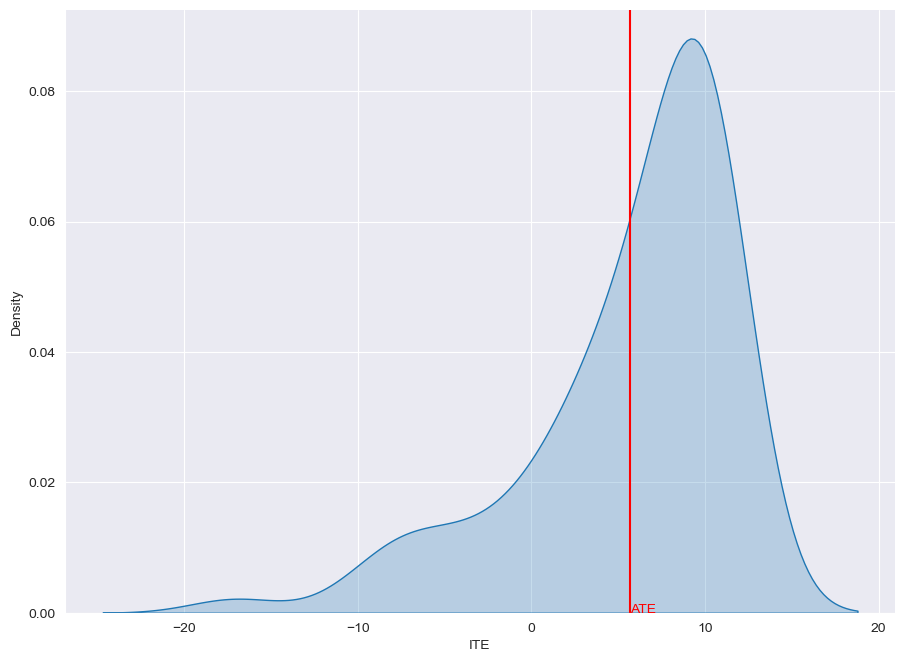

In [4]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(dragonnet.predict_ite(x_te))

### Ground Truth 

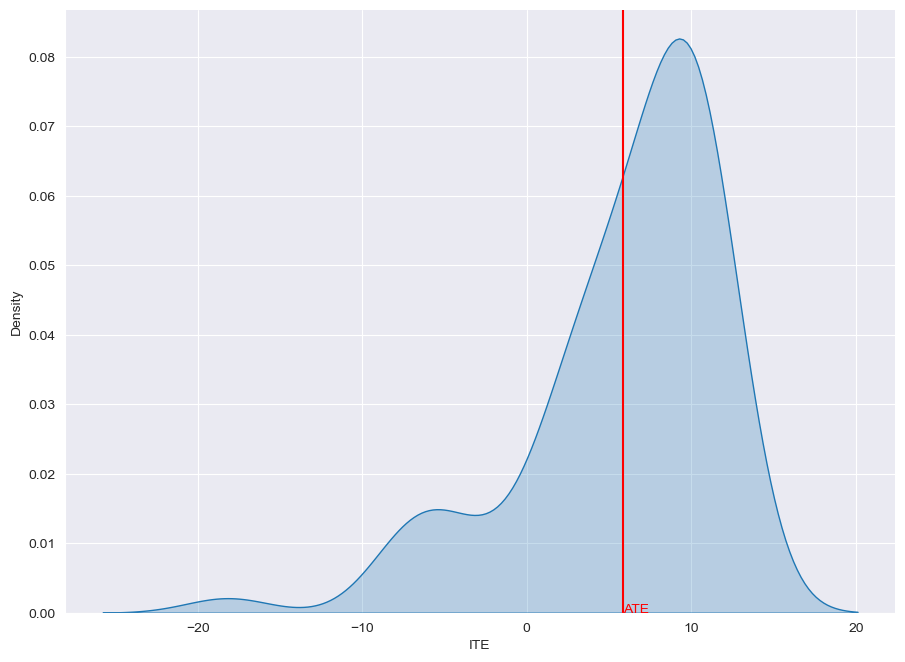

In [5]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(ITE_truth_te)